### Gather

In [1]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV file into DataFrame 
twitter_archive = pd.read_csv ('C:\\Users\\Teresa\\twitter-archive-enhanced.csv') 

In [3]:
# Tweet image predictions, what breed of dog (or other object, animal, etc.) is present in each tweet according to neural network
prediction_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

with open(prediction_url.split("/")[-1],"wb") as file:
    file.write(requests.get(prediction_url).content)

In [4]:
# Read image predictions of tsv file into DataFrame 
image_predictions = pd.read_csv('image-predictions.tsv', sep ='\t')


In [5]:
#Setting up Twitter's Tweepy API
consumer_key = 'My Consumer Key'
consumer_secret = 'My Consumer Secret'
access_token = 'My Access Token'
access_secret = 'My Access Secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)



In [6]:
#Query twitter for tweet id and write it's JSON data to tweet_json.txt
count=0
tweet_ids = twitter_archive['tweet_id']
with open('tweet_json.txt','w') as file:
    for id in tweet_ids:
        try:
            status = api.get_status(id,tweet_mode='extended')
            json.dump(status._json,file)
            file.write("\n")
        except:
            pass

Rate limit reached. Sleeping for: 730
Rate limit reached. Sleeping for: 768


In [7]:
#Create a pandas dataframe for JSON data
tweet_json = pd.read_json('tweet_json.txt',lines=True)

#Save dataframe to csv for visual assessment
tweet_json.to_csv('tweet_json.csv')

## Access

In [8]:
# let's look at descriptive statistics of the twitter dataframe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The data below shows that the dataset contains 181 observations that are retweets; which we will remove later.

In [9]:
# info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Let's look and see if any names are missing

In [11]:
# what names are missing
twitter_archive[twitter_archive['name']=='None']['name']

5       None
7       None
12      None
24      None
25      None
30      None
32      None
35      None
37      None
41      None
42      None
47      None
55      None
59      None
62      None
64      None
72      None
78      None
83      None
88      None
89      None
93      None
96      None
99      None
100     None
101     None
103     None
110     None
112     None
113     None
        ... 
2294    None
2298    None
2299    None
2301    None
2305    None
2306    None
2307    None
2310    None
2316    None
2320    None
2321    None
2322    None
2323    None
2324    None
2328    None
2329    None
2330    None
2331    None
2332    None
2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2351    None
2355    None
Name: name, Length: 745, dtype: object

Are there any rating denominators that are greater than 10?

In [12]:

twitter_archive[twitter_archive['rating_denominator'].astype(int)>10]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


Now let's do the same thing and look at the rating denominators to determine if any are less than 10

In [13]:
twitter_archive[twitter_archive['rating_denominator'].astype(int)< 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


Are there any duplicates?

In [14]:
#Look for duplicates
twitter_archive[twitter_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [190]:
# let's look at descriptive statistics of the image predictions dataframe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
# Summary of the image prediction data
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Let's check to see which tweets do not have an image

In [16]:
#check for tweets that do not have an image 
no_images=[]
for i in range(len(tweet_json)):
    if 'media' not in list(tweet_json['entities'][i].keys()):
        no_images.append(i)
print("There are {} tweets that do not have an image".format(len(no_images)))

There are 275 tweets that do not have an image


In [193]:
# Let's look at the tweet dataframe
tweet_json.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2343.000000,0.0,2.343000e+03,2.343000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2206.0,2206.0,2.600000e+01,2.600000e+01,2343.000000
mean,NaN,NaN,8043.100299,NaN,7.422769e+17,7.422769e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.113972e+17,8.113972e+17,2985.667093
std,NaN,NaN,12205.703295,NaN,6.836264e+16,6.836264e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4948.146009
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1395.500000,NaN,6.783607e+17,6.783607e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.761338e+17,7.761338e+17,600.000000
50%,NaN,NaN,3519.000000,NaN,7.186315e+17,7.186315e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1399.000000
75%,NaN,NaN,9911.500000,NaN,7.986999e+17,7.986999e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3486.500000
max,NaN,NaN,142491.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,76809.000000


In [17]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2343 non-null datetime64[ns]
display_text_range               2343 non-null object
entities                         2343 non-null object
extended_entities                2068 non-null object
favorite_count                   2343 non-null int64
favorited                        2343 non-null bool
full_text                        2343 non-null object
geo                              0 non-null float64
id                               2343 non-null int64
id_str                           2343 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

#### Quality Issues

1.Dataset contains retweets
2.Some of the tweets do not have images
3.Some of the rating denominators are < 10
4.Some of the rating denominators are < 10
5.Some of the dog names are incorrect
6.Column headers "p1", "p2", "p3", "p1_conf", "p2_conf", "p3_conf", "p1_dog", "p2_dog", and "p3_dog"" are not intuitive to what it contains and should be changed
7.Replace instances of "& amp" with just "&"
8.timestamp, retweeted_status_timestamp have incorrect datatype.  They are showing as datatype string

#### Tidiness Issues

1.The column headers "doggo", "floofer", "pupper", and "puppo" should be merged into one column
2.The three separate datasets should be merged into one dataset

### Clean

Before cleaning let's start off by creating copies of the original dataframes

In [18]:
# copies of original dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json[['id','retweet_count','favorite_count']].copy()

#### Define

In [ ]:
Dataset contains retweets.  Needs to be deleted.

#### Code

In [19]:
#retweeted columns to delete
retweeted_columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']

#remove rows and columns from twitter_archive
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean = twitter_archive_clean.drop(columns=retweeted_columns)

#### Test

In [20]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### Define

Remove the data where there are no images (expanded_urls)

#### Code

In [21]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [22]:
sum(twitter_archive_clean['expanded_urls'].isnull())

0


#### Define

In [ ]:
Correct the rating of denominators that are > 10

#### Code

In [23]:
#correct rating denominator greater than 10
twitter_archive_clean.loc[(twitter_archive_clean.rating_denominator> 10),"rating_denominator"]=10

#### Test

In [24]:
twitter_archive_clean[twitter_archive_clean['rating_denominator']> 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

In [ ]:
Correct the rating of denominators that are < 10

#### Code

In [25]:
#correct rating denominator less than 10
twitter_archive_clean.loc[(twitter_archive_clean.rating_denominator< 10),"rating_denominator"]=10

#### Test

In [26]:
twitter_archive_clean[twitter_archive_clean['rating_denominator']< 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

In [ ]:
Remove invalid dog names

#### Code

In [27]:
#Invalid names list
invalid_names=['a','the','an','very','quite','his','life','infuriating',
               'all','unacceptable','my','old','officially','this']

In [28]:
#Change the invalid names to None
for name in invalid_names: 
    twitter_archive_clean.loc[twitter_archive_clean.name == name ] = np.NaN

#### Test

In [29]:
# Display unique values of names and extract invalid names
twitter_archive_clean.name.value_counts()

None         622
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Lola           8
Winston        8
Sadie          8
Daisy          7
Toby           7
Bailey         6
Bo             6
Koda           6
Oscar          6
Bella          6
Stanley        6
Jax            6
Bentley        5
Dave           5
Rusty          5
Louis          5
Scout          5
Leo            5
Chester        5
Milo           5
Buddy          5
Gus            4
Sophie         4
            ... 
Joey           1
Dot            1
Damon          1
Blu            1
Fynn           1
Ember          1
Obi            1
Batdog         1
Mojo           1
Willy          1
Timber         1
Kathmandu      1
Dale           1
Philippe       1
Jeffrie        1
Bell           1
Chevy          1
Quinn          1
Kial           1
Jazz           1
Jimbo          1
Cannon         1
Eevee          1
Seamus         1
Randall        1
Chuck          1
Kuyu           1
Glacier       

#### Define

Column headers "p1", "p2", "p3", "p1_conf", "p2_conf", "p3_conf", "p1_dog", "p2_dog", and "p3_dog"" are not intuitive to what it contains and should be changed

#### Code

In [30]:
## Rename columns
image_predictions_clean.rename(columns={'p1':'prediction1',
                            'p2':'prediction2',
                            'p3':'prediction3',
                            'p1_conf':'prediction1_confidence',
                            'p2_conf':'prediction2_confidence',
                            'p3_conf':'prediction3_confidence',
                            'p1_dog':'prediction1_dog',
                            'p2_dog':'prediction2_dog',
                            'p3_dog':'prediction3_dog'}, inplace=True)

#### Test

In [31]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null int64
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_dog           2075 non-null bool
prediction2               2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_dog           2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define

In [ ]:
Replace instances of "& amp" with just "&"

#### Code

In [32]:
twitter_archive_clean.text = twitter_archive_clean.text.str.replace('&amp;','&')

#### Test

In [33]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;', na=False, regex=True)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

In [ ]:
Change timestamp datatype to datetime

#### Code

In [34]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2032 non-null float64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2032 non-null datetime64[ns]
source                   2032 non-null object
text                     2032 non-null object
expanded_urls            2032 non-null object
rating_numerator         2032 non-null float64
rating_denominator       2032 non-null float64
name                     2032 non-null object
doggo                    2032 non-null object
floofer                  2032 non-null object
pupper                   2032 non-null object
puppo                    2032 non-null object
dtypes: datetime64[ns](1), float64(5), object(8)
memory usage: 248.1+ KB


#### Define

In [ ]:
Merge column headers "doggo", "floofer", "pupper", and "puppo" into one column

#### Code

In [36]:
# Create a dog type variable  
twitter_archive_clean['dog_type'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [37]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

#### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2032 non-null float64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2032 non-null datetime64[ns]
source                   2032 non-null object
text                     2032 non-null object
expanded_urls            2032 non-null object
rating_numerator         2032 non-null float64
rating_denominator       2032 non-null float64
name                     2032 non-null object
dog_type                 347 non-null object
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 198.5+ KB


#### Define

In [ ]:
Merge the three separate datasets into one dataset:

twitter_archive_clean
image_predictions_clean
tweet_json_clean

#### Code

In [39]:
archive_clean=pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='left')

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id                  2032 non-null object
in_reply_to_status_id     23 non-null float64
in_reply_to_user_id       23 non-null float64
timestamp                 2032 non-null datetime64[ns]
source                    2032 non-null object
text                      2032 non-null object
expanded_urls             2032 non-null object
rating_numerator          2032 non-null float64
rating_denominator        2032 non-null float64
name                      2032 non-null object
dog_type                  347 non-null object
jpg_url                   1245 non-null object
img_num                   1245 non-null float64
prediction1               1245 non-null object
prediction1_confidence    1245 non-null float64
prediction1_dog           1245 non-null object
prediction2               1245 non-null object
prediction2_confidence    1245 non-null float64
prediction2_dog           1245 non-nu

In [41]:
archive_clean=pd.merge(archive_clean, tweet_json_clean, left_on='tweet_id', right_on='id')

#### Test

In [42]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1327
Data columns (total 25 columns):
tweet_id                  1328 non-null object
in_reply_to_status_id     15 non-null float64
in_reply_to_user_id       15 non-null float64
timestamp                 1328 non-null datetime64[ns]
source                    1328 non-null object
text                      1328 non-null object
expanded_urls             1328 non-null object
rating_numerator          1328 non-null float64
rating_denominator        1328 non-null float64
name                      1328 non-null object
dog_type                  225 non-null object
jpg_url                   1244 non-null object
img_num                   1244 non-null float64
prediction1               1244 non-null object
prediction1_confidence    1244 non-null float64
prediction1_dog           1244 non-null object
prediction2               1244 non-null object
prediction2_confidence    1244 non-null float64
prediction2_dog           1244 non-nu

### Store

In [43]:
# Save the clean dataframe to csv 
archive_clean.to_csv('twitter_archive_master.csv')

In [44]:
# Test the stored data
pd.read_csv('twitter_archive_master.csv').head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,id,retweet_count,favorite_count
0,0,8.918152e+17,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,4153,24900
1,1,8.916896e+17,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,8651,41977
2,2,8.913276e+17,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,9401,40108
3,3,8.910880e+17,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,891087950875897856,3112,20107
4,4,8.907292e+17,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,890729181411237888,18875,65159


### Analyze

In [45]:
master_copy = archive_clean.copy()

The rating numerator for 75% is 12 and jumps significantly at the max to 1776.  This indicates that an outlier exist

In [46]:
master_copy.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,prediction1_confidence,prediction2_confidence,prediction3_confidence,id,retweet_count,favorite_count
count,1.500000e+01,1.500000e+01,1328.000000,1328.0,1244.000000,1244.000000,1.244000e+03,1.244000e+03,1.328000e+03,1328.000000,1328.000000
mean,7.002882e+17,4.196984e+09,12.747741,10.0,1.191318,0.588205,1.363432e-01,6.099980e-02,7.349574e+17,2622.762048,8464.021084
std,5.013317e+16,0.000000e+00,50.288860,0.0,0.547404,0.274788,1.017392e-01,5.188500e-02,6.605234e+16,4075.907222,11350.172571
min,6.671522e+17,4.196984e+09,1.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,6.660712e+17,12.000000,80.000000
25%,6.732617e+17,4.196984e+09,10.000000,10.0,1.000000,0.354003,5.430538e-02,1.605498e-02,6.765081e+17,608.000000,1933.750000
50%,6.757073e+17,4.196984e+09,11.000000,10.0,1.000000,0.582692,1.198375e-01,4.906315e-02,7.088439e+17,1310.000000,4022.000000
75%,7.031489e+17,4.196984e+09,12.000000,10.0,1.000000,0.839170,1.978287e-01,9.465185e-02,7.817352e+17,3107.250000,10706.000000
max,8.558181e+17,4.196984e+09,1776.000000,10.0,4.000000,1.000000,4.676780e-01,2.710420e-01,8.918152e+17,60626.000000,122281.000000


#### Top 10 of p1 predictions for retweet and favorite count

Text(0.5,1,'TOP10 of p1 predictions for favorite_count')

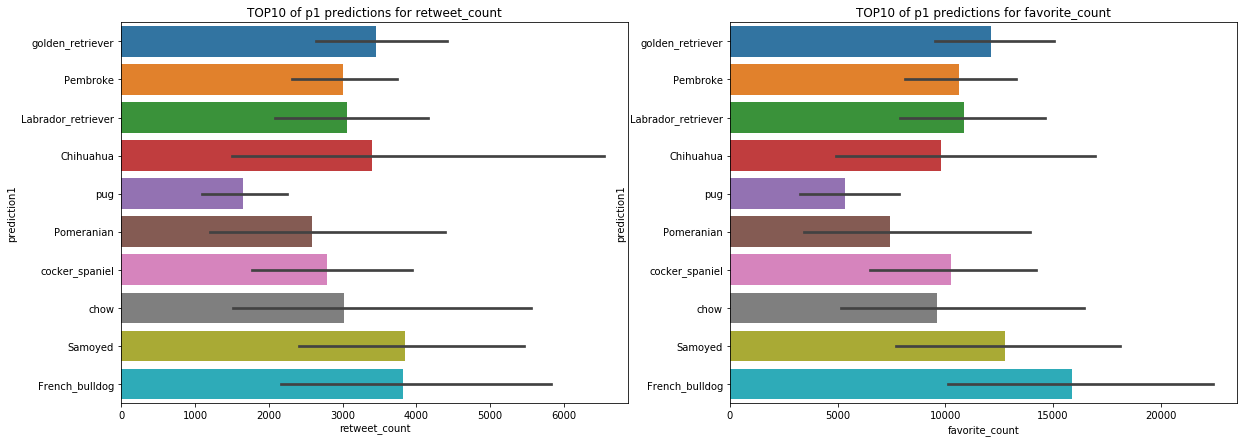

In [47]:
plt.figure(figsize=(20,7))
plt.subplot(121)
sns.barplot(y="prediction1",x="retweet_count",data=master_copy, order=master_copy.prediction1.value_counts().iloc[:10].index)
plt.title('TOP10 of p1 predictions for retweet_count')

plt.subplot(122)
sns.barplot(y="prediction1",x="favorite_count",data=master_copy, order=master_copy.prediction1.value_counts().iloc[:10].index)
plt.title('TOP10 of p1 predictions for favorite_count')

#### Dogs by Type

In [ ]:
Dogs are most likely to be classified as puppers, followed by doggos, puppos, and trailing would be floofers.  The favorites count clearly goes to 
the puppos @ 1055696

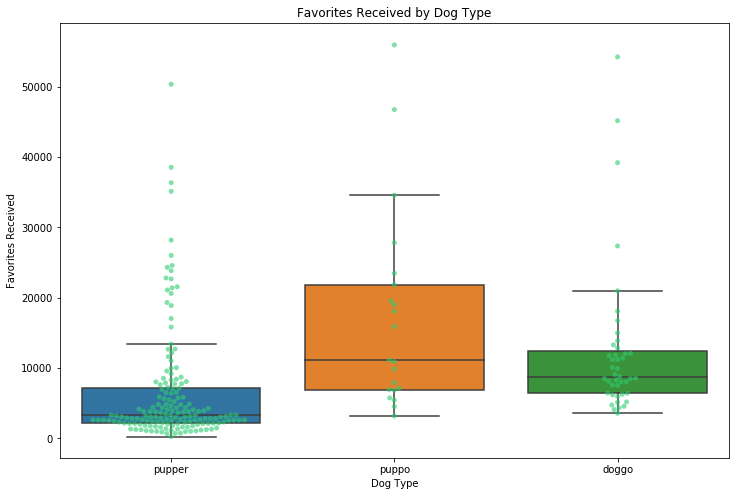

In [48]:
plt.subplots(figsize=(12,8))

x = master_copy.dog_type
y = master_copy.favorite_count

ax = sns.boxplot(x=x, y=y, showfliers=False)
ax = sns.swarmplot(x=x, y=y, color="#2ecc71", alpha=0.6)
plt.xlabel('Dog Type')
plt.ylabel('Favorites Received')
plt.title('Favorites Received by Dog Type')

fig = ax.get_figure()
fig.savefig('ByDogTypes.png');

#### Insights

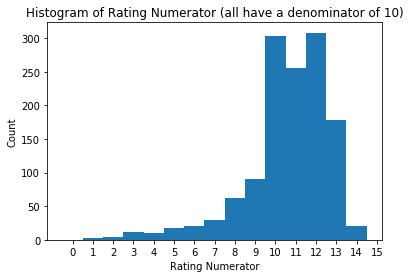

In [49]:
# let's plot the ratings that are less than 15
plt.hist(master_copy.rating_numerator[master_copy.rating_numerator <= 15], 
         bins=np.arange(0,16,step=1), align='left');
plt.xticks(np.arange(0,16,step=1));
plt.title('Histogram of Rating Numerator (all have a denominator of 10)');
plt.xlabel('Rating Numerator');
plt.ylabel('Count');

##### Insight # 1


Ratings of 10/10 to 13/10 are the most popular. The mean rating is approximately 12.2/10. However, the median rating is 11/10.  

Text(0.5,1,'Retweeting based on numerator score')

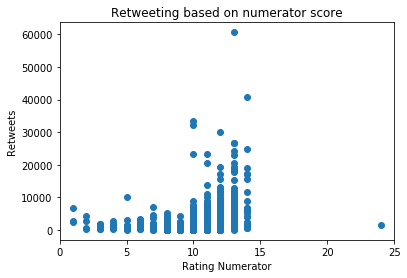

In [50]:

plt.scatter(master_copy.rating_numerator, master_copy.retweet_count)
plt.xlim(0,25)
plt.xlabel('Rating Numerator')
plt.ylabel('Retweets')
plt.title('Retweeting based on numerator score')

##### Insight # 2

The dogs with the highest retweets were dogs that received scores of 13/10. The highest rating numerator goes to a dog named "Atticus".  Atticus received a score of 1776 over 10. Wow! Atticus must have warmed someone's heart.

Text(0.5,1,'Favoriting based on numerator score')

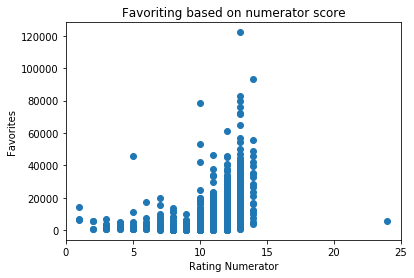

In [51]:
plt.scatter(master_copy.rating_numerator, master_copy.favorite_count)
plt.xlim(0,25)
plt.xlabel('Rating Numerator')
plt.ylabel('Favorites')
plt.title('Favoriting based on numerator score')

##### Insight # 3

The most common rating numerator based on number of favorites is 13.  The data suggests as Favorites increase the rating numerator increases as well. 


#### References

Setting up Twitter API access - https://stackoverflow.com/questions/17049821/setting-up-twitter-api-getting-the-last-few-tweets
WeRateDogs - https://www.themuse.com/advice/how-creator-of-weratedogs-twitter-account-started-career
Writing to JSON files - http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/ 